# Credit card Fraud detection: 

Problem statement: The Credit Card Fraud Detection Problem includes modelling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.
1) The model used must be simple and fast enough to detect the anomaly and classify it as a fraudulent transaction as quickly as possible
2) For protecting the privacy of the user, the dimensionality of the data can be reduced


> Import libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

> Loading the data

In [48]:
Data=pd.read_csv("C:/Users/Abhishek/anaconda3/creditcard.csv")

> Understand data

In [49]:
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
print(Data.shape)

(284807, 31)


> Describing the data

In [51]:
print(Data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

> Imbalance in the data and
determine number of fraud cases in datasets

In [52]:
fraud=Data[Data['Class']==1]
valid=Data[Data['Class']==0]
outlierFraction=len(fraud)/float(len(valid))
print(outlierFraction)

0.0017304750013189597


In [53]:
print('Fraud Cases: {}'.format(len(Data[Data['Class']==1])))
print('Valid transactions: {}'.format(len(Data[Data['Class']==0])))

Fraud Cases: 492
Valid transactions: 284315


* Observation: The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions.


> Print the amount details for Fraudulent Transaction:

In [54]:
print("fraud transaction detail")
fraud.Amount.describe()

fraud transaction detail


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

> Print the amount details for Normal Transaction:

In [55]:
print("Normal vaild trasactions")
valid.Amount.describe()

Normal vaild trasactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

: Clearly shows the average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with

> Plotting the Correlation Matrix: The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.

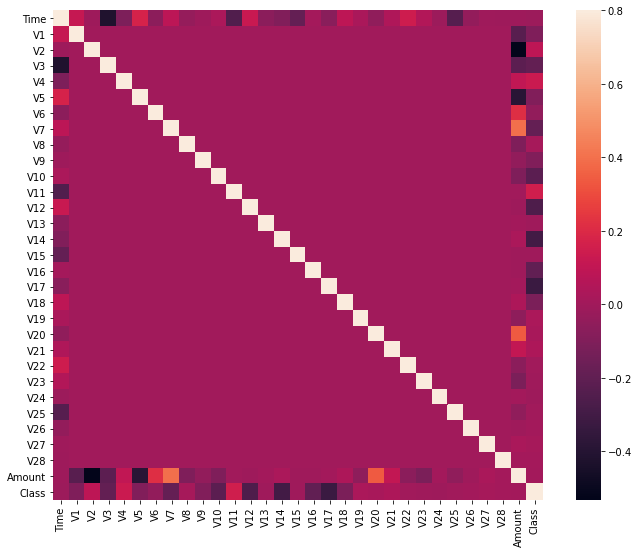

In [56]:
corrmat=Data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()


: V2 and V5 are highly negatively correlated with the feature called Amount. 
We also see some correlation with V20 and Amount This gives us a deeper understanding of the Data available to us

> Separating the X and the Y values: 

In [57]:
X=Data.drop(['Class'], axis=1)
Y=Data["Class"]
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [58]:
xData=X.values
yData=Y.values

> Training and Testing Data Bifurcation and 
using skicitlearn to split data into traning and testing sets.
> we will dividing the dataset into two main groups. One for training the model and the other for Testing our trained model’s performance

In [59]:
from sklearn.model_selection import train_test_split
#Split the data into traning and testing sets
xTrain,xTest, yTrain, yTest=train_test_split(xData, yData, test_size=0.2, random_state=42)

> Building the random forest model using skicit learn and 
building the random forest classifier (Random forest)

In [61]:
from sklearn.ensemble import RandomForestClassifier
#random forest model creation
rfc=RandomForestClassifier()
rfc.fit(xTrain,yTrain)
#prediction
yPred=rfc.predict(xTest)

> Building all kinds of evaluating parameters. 
Evaluating the classifier and print every score of the classifier

In [72]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliners=len(fraud)
n_errors=(yPred!=yTest).sum()
print("Random forest classifier")
accuracy=accuracy_score(yTest, yPred)
print("Accurcy = {}".format(accuracy))
precision=precision_score(yTest, yPred)
print("Precision = {}".format(precision))
recall=recall_score(yTest, yPred)
print("Recall = {}".format(recall))
f1=f1_score(yTest,yPred)
print("F1_score is = {}".format(f1))
MCC=matthews_corrcoef(yTest, yPred)
print("Matthews correlation coefficient = {}".format(MCC))


Random forest classifier
Accurcy = 0.9995786664794073
Precision = 0.9625
Recall = 0.7857142857142857
F1_score is = 0.8651685393258427
Matthews correlation coefficient = 0.8694303688259544


> Visulalizing the Confusion Matrix: A confusion matrix is a table that is often used to describe the performance of a classification model

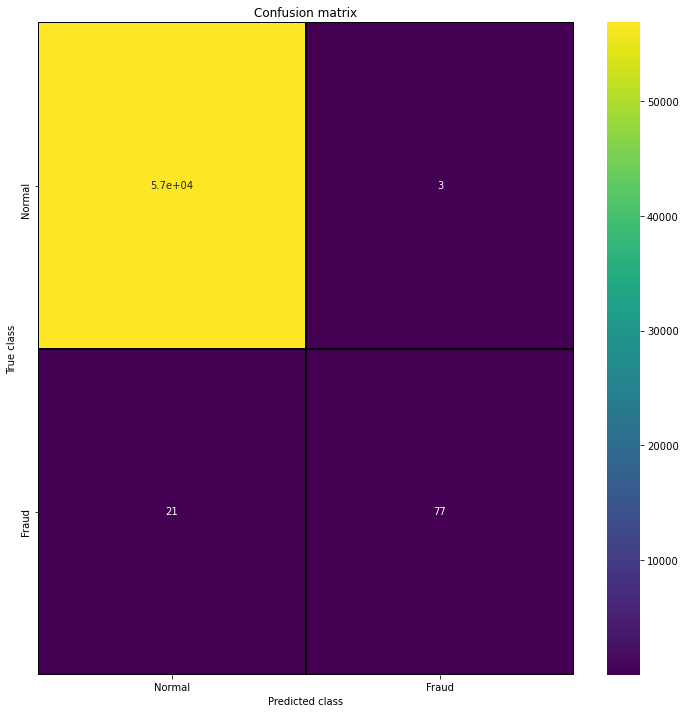

In [73]:
Labels=['Normal','Fraud']
confusion_matrix=confusion_matrix(yTest,yPred)
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, cmap='viridis', linecolor='black',linewidths=1);
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()
